In [1]:
import sqlite3
import pandas as pd
import tempun 
import geopandas as gpd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load geospatial data
greek_world_gdf = gpd.read_file("greek_world_gdf.geojson", driver="GeoJSON")
greek_world_uu = greek_world_gdf.geometry.unary_union

latin_world_gdf = gpd.read_file("latin_world_gdf.geojson", driver="GeoJSON")
latin_world_uu = latin_world_gdf.geometry.unary_union

In [3]:
conn = sqlite3.connect('large_files/cultura_12_2024.db')
# Chose a table to extract
table_name = 'individuals_main_information'

# Load the table as a pandas DataFrame
cultura = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

In [4]:
cultura.shape

(220770, 8)

In [5]:
cultura.head(10)

,individual_wikidata_id,individual_name,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score
0,Q55844134,Ernst von Heeringen,1810.0,1820-1870,None,None,NaN,6.0
1,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0
2,Q94835418,Georg Kurtscholz,1847.0,1860-1910,None,None,NaN,4.0
3,Q33934701,Margarethe Sömmering,1768.0,1780-1830,None,None,0.100135,1.0
4,Q4350107,Vassili Perevoštšikov,1785.0,1800-1850,RUS,Russia,0.101319,4.0
5,Q1028749,Christian Friedrich Zincke,1683.0,1690-1740,GBR,United Kingdom,0.100409,37.0
6,Q2822993,Achard of Saint-Victor,1100.0,1110-1160,GBR,United Kingdom,0.101588,46.0
7,Q105607234,Angelo Dalbon,1787.0,1800-1850,ITA,Italy,0.100120,4.0
8,Q91771,Hans Krumpper,1570.0,1580-1630,DEU,Germany,0.101971,24.0
9,Q5362982,Elizabeth Hoby,1528.0,1540-1590,GBR,United Kingdom,0.101881,23.0


In [6]:

# Chose a table to extract
table_name = 'individuals_regions'
# Load the table as a pandas DataFrame
individuals_regions = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
individuals_regions.head(10)

,individual_wikidata_id,individual_name,region_code,region_name
0,Q202809,Frederick Coombs,re_british_islands,British Islands
1,Q1028749,Christian Friedrich Zincke,re_british_islands,British Islands
2,Q2822993,Achard of Saint-Victor,re_british_islands,British Islands
3,Q5362982,Elizabeth Hoby,re_british_islands,British Islands
4,Q246595,Joseph Smit,re_british_islands,British Islands
5,Q30611696,James Davies,re_british_islands,British Islands
6,Q6141543,James Quin,re_british_islands,British Islands
7,Q21455534,Alice Westlake,re_british_islands,British Islands
8,Q4889423,Benjamin Wrigglesworth Beatson,re_british_islands,British Islands
9,Q21457161,James Irvine,re_british_islands,British Islands


In [7]:
(individuals_regions["region_name"]=="Latin World").sum()

454

In [8]:
(individuals_regions["region_name"] == "Greek World").sum()

1690

In [9]:
cultura = cultura.merge(individuals_regions, how="outer", on="individual_wikidata_id")

In [10]:
cultura = cultura[cultura["individual_impact_years"].notnull()]

In [11]:
years = "-20-30"
re.search("(\-?\d+)(\-)(\-?\d+)", years).groups()

('-20', '-', '30')

In [12]:
cultura["not_before"] = cultura["individual_impact_years"].apply(
    lambda x: int(re.search("(\-?\d+)(\-)(\-?\d+)", x).groups()[0]))
cultura["not_after"] = cultura["individual_impact_years"].apply(
    lambda x: int(re.search("(\-?\d+)(\-)(\-?\d+)", x).groups()[2]))

In [13]:
cultura["random_dates"] = cultura.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)

In [14]:
cultura.head(10)

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,individual_name_y,region_code,region_name,not_before,not_after,random_dates
0,Q55844134,Ernst von Heeringen,1810.0,1820-1870,None,None,NaN,6.0,NaN,NaN,NaN,1820,1870,"[1848, 1833, 1835, 1842, 1853, 1836, 1833, 182..."
1,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,Frederick Coombs,re_british_islands,British Islands,1810,1860,"[1856, 1821, 1835, 1858, 1847, 1842, 1835, 181..."
2,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,Frederick Coombs,re_northwestern_europe,Northwestern Europe,1810,1860,"[1829, 1848, 1822, 1836, 1837, 1825, 1833, 185..."
3,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,Frederick Coombs,re_united_kingdom,United Kingdom,1810,1860,"[1824, 1819, 1849, 1835, 1852, 1842, 1856, 182..."
4,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,Frederick Coombs,re_western_europe,Western Europe,1810,1860,"[1858, 1859, 1851, 1829, 1832, 1816, 1857, 185..."
5,Q94835418,Georg Kurtscholz,1847.0,1860-1910,None,None,NaN,4.0,NaN,NaN,NaN,1860,1910,"[1864, 1885, 1898, 1896, 1884, 1870, 1874, 188..."
6,Q33934701,Margarethe Sömmering,1768.0,1780-1830,None,None,0.100135,1.0,NaN,NaN,NaN,1780,1830,"[1829, 1790, 1819, 1799, 1800, 1786, 1826, 180..."
7,Q4350107,Vassili Perevoštšikov,1785.0,1800-1850,RUS,Russia,0.101319,4.0,Vassili Perevoštšikov,re_eastern_europe,Eastern Europe,1800,1850,"[1849, 1836, 1846, 1833, 1810, 1843, 1829, 184..."
8,Q4350107,Vassili Perevoštšikov,1785.0,1800-1850,RUS,Russia,0.101319,4.0,Vassili Perevoštšikov,re_slav_world,Slav world,1800,1850,"[1822, 1846, 1842, 1828, 1808, 1828, 1818, 183..."
9,Q1028749,Christian Friedrich Zincke,1683.0,1690-1740,GBR,United Kingdom,0.100409,37.0,Christian Friedrich Zincke,re_british_islands,British Islands,1690,1740,"[1727, 1723, 1691, 1690, 1711, 1707, 1697, 171..."


In [15]:
cultura_index = pd.read_csv("large_files/cultura_index_18032024.csv")
cultura_index.head(5)

,Unnamed: 0,decade,occupation,count_cps,N_est,lower,upper,region_name,model_type
0,0,840,Written work,1,12.737580,10.194953,15.478997,Central Europe,occupation_model
1,1,850,Written work,1,12.382427,9.965798,14.953926,Central Europe,occupation_model
2,2,960,Written work,1,9.182749,7.618665,10.865176,Central Europe,occupation_model
3,3,1040,Written work,1,8.341506,6.957368,9.794903,Central Europe,occupation_model
4,4,1080,Written work,1,8.414305,7.099336,9.812688,Central Europe,occupation_model


In [16]:
cultura["birthyear_plus35"] = cultura["birthyear"] + 35

## Cultura Greek and Latin Worlds

In [17]:
cultura_greek_world = cultura[cultura["region_name"]=="Greek World"]
cultura_latin_world = cultura[cultura["region_name"]=="Latin World"]

In [18]:
greek_world_gdf.set_index("name", inplace=True)
latin_world_gdf.set_index("name", inplace=True)

In [19]:
country = "France"
not_before = -900
not_after = 250
(not_before <= greek_world_gdf.loc[country]["max_date"]) & (
        not_after >= greek_world_gdf.loc[country]["min_date"])

True

In [20]:
def filter_by_country_temporal_inclusion(row, countries_gdf):
    try:
        return (row["not_before"] <= countries_gdf.loc[row["country_name"]]["max_date"]) & (row["not_after"] >= countries_gdf.loc[row["country_name"]]["min_date"])
    except:
        return False

In [21]:
len(cultura_greek_world)

1690

In [22]:
cultura_greek_world = cultura_greek_world[cultura_greek_world.apply(lambda row: filter_by_country_temporal_inclusion(row, greek_world_gdf), axis=1)]
len(cultura_greek_world)

994

In [23]:
len(cultura_latin_world)

454

In [24]:
cultura_latin_world = cultura_latin_world[cultura_latin_world.apply(lambda row: filter_by_country_temporal_inclusion(row, latin_world_gdf), axis=1)]
len(cultura_latin_world)

454

In [25]:
# cultura_greek_world["identifier_score_norm"] = cultura_greek_world["identifier_score"] / cultura_greek_world["identifier_score"].max()

Text(0, 0.5, 'Individual Immaterial Index (number of references in catalogs)')

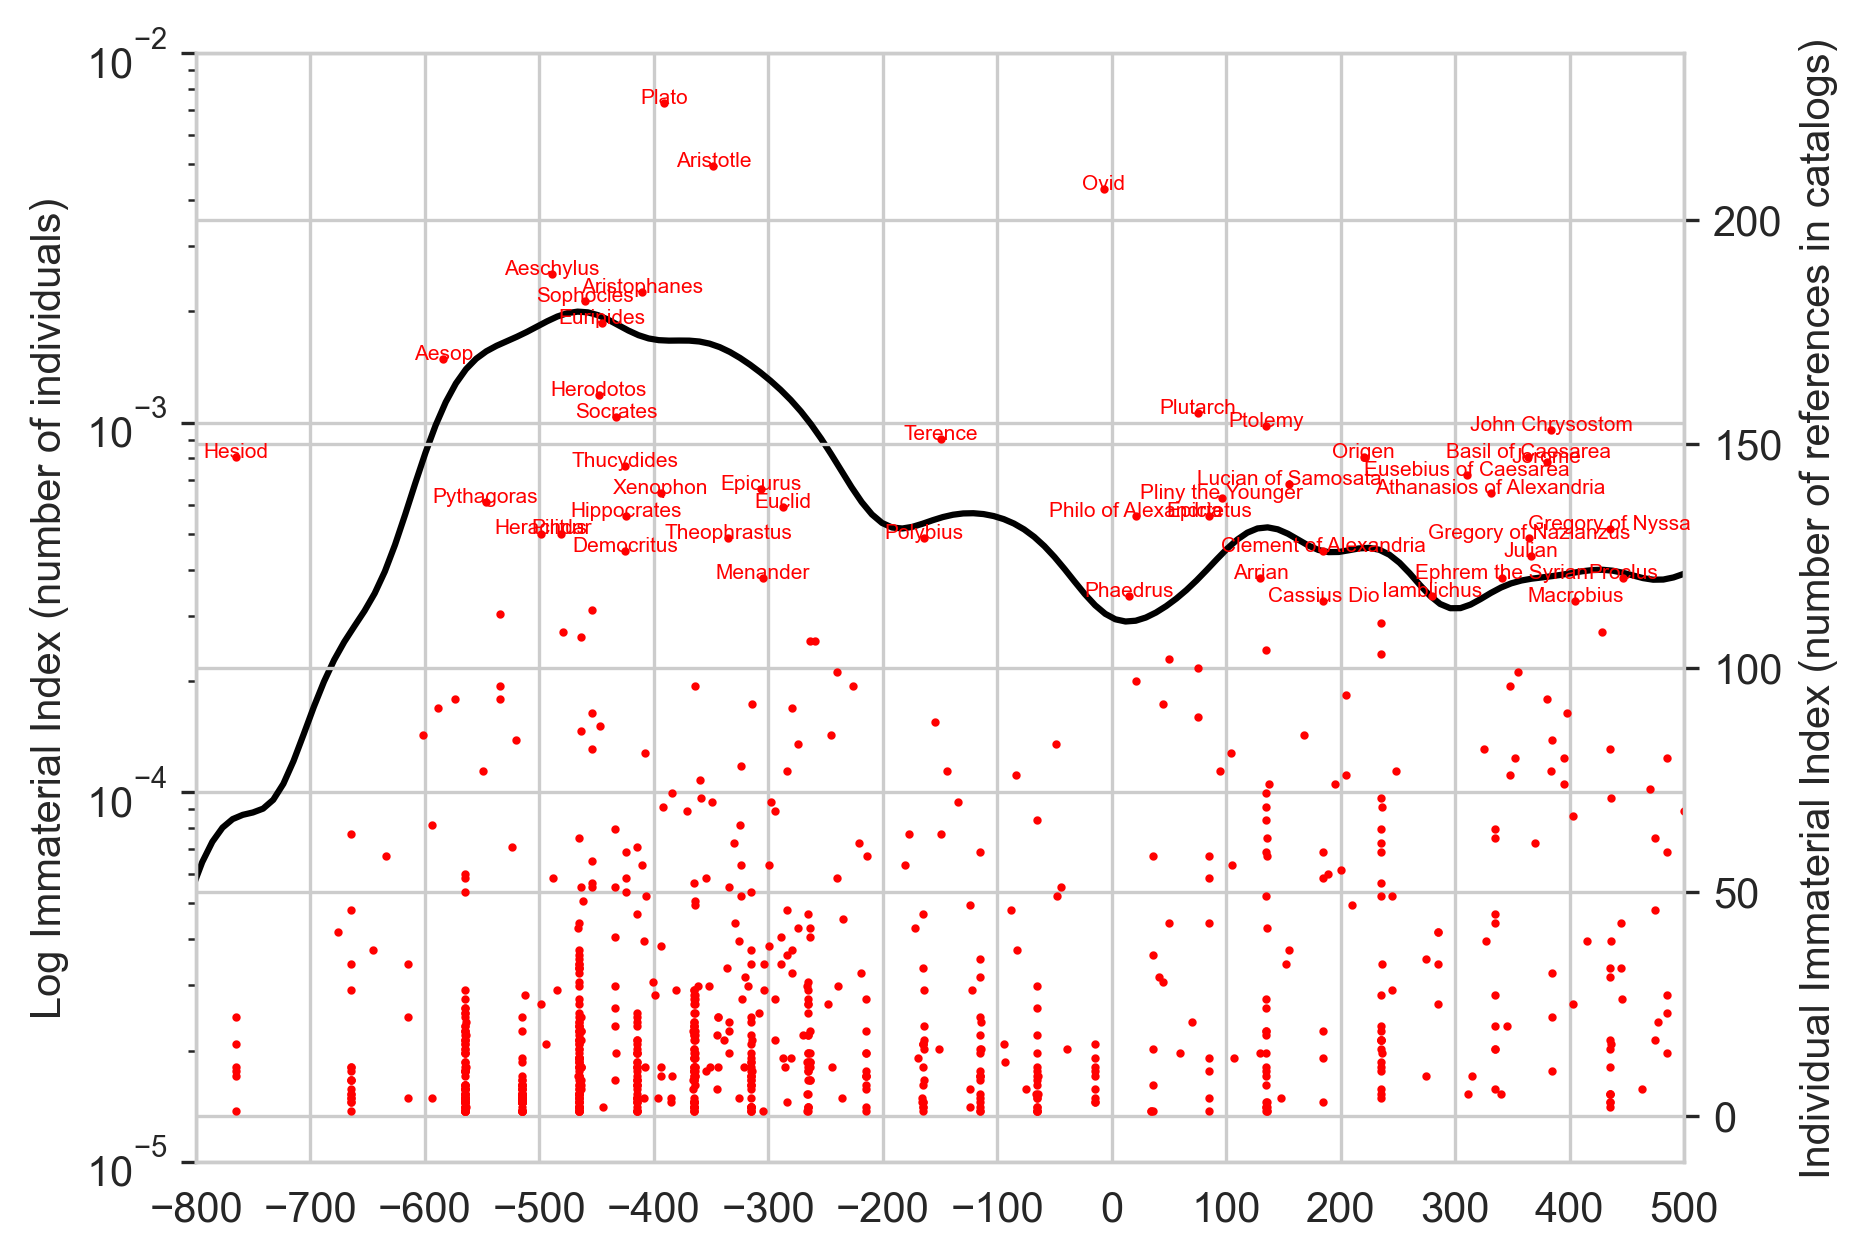

In [66]:
fig, ax1 = plt.subplots(dpi=300)

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax1)
# Show the plot
ax1.set_yscale('log')
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800,600,100))
ax1.set_ylim(1e-5, 1e-2)
ax1.set_ylabel("Log Immaterial Index (number of individuals)")
ax1.set_xlabel("")

ax2 = ax1.twinx()

max = cultura_greek_world["identifier_score"].max()
plt.scatter(cultura_greek_world["birthyear_plus35"], cultura_greek_world["identifier_score"], color="red", s=1)
for i, txt in enumerate(cultura_greek_world["individual_name_x"]):
    if cultura_greek_world["identifier_score"].iloc[i] > (max/2):
        ax2.annotate(txt, (cultura_greek_world["birthyear_plus35"].iloc[i], cultura_greek_world["identifier_score"].iloc[i]), ha="center", fontsize=5, color="red")
ax2.set_ylabel("Individual Immaterial Index (number of references in catalogs)")

In [67]:
fig.savefig("am_figures/cultura_greek_world.png")

Text(0, 0.5, 'Individual Immaterial Index (number of references in catalogs)')

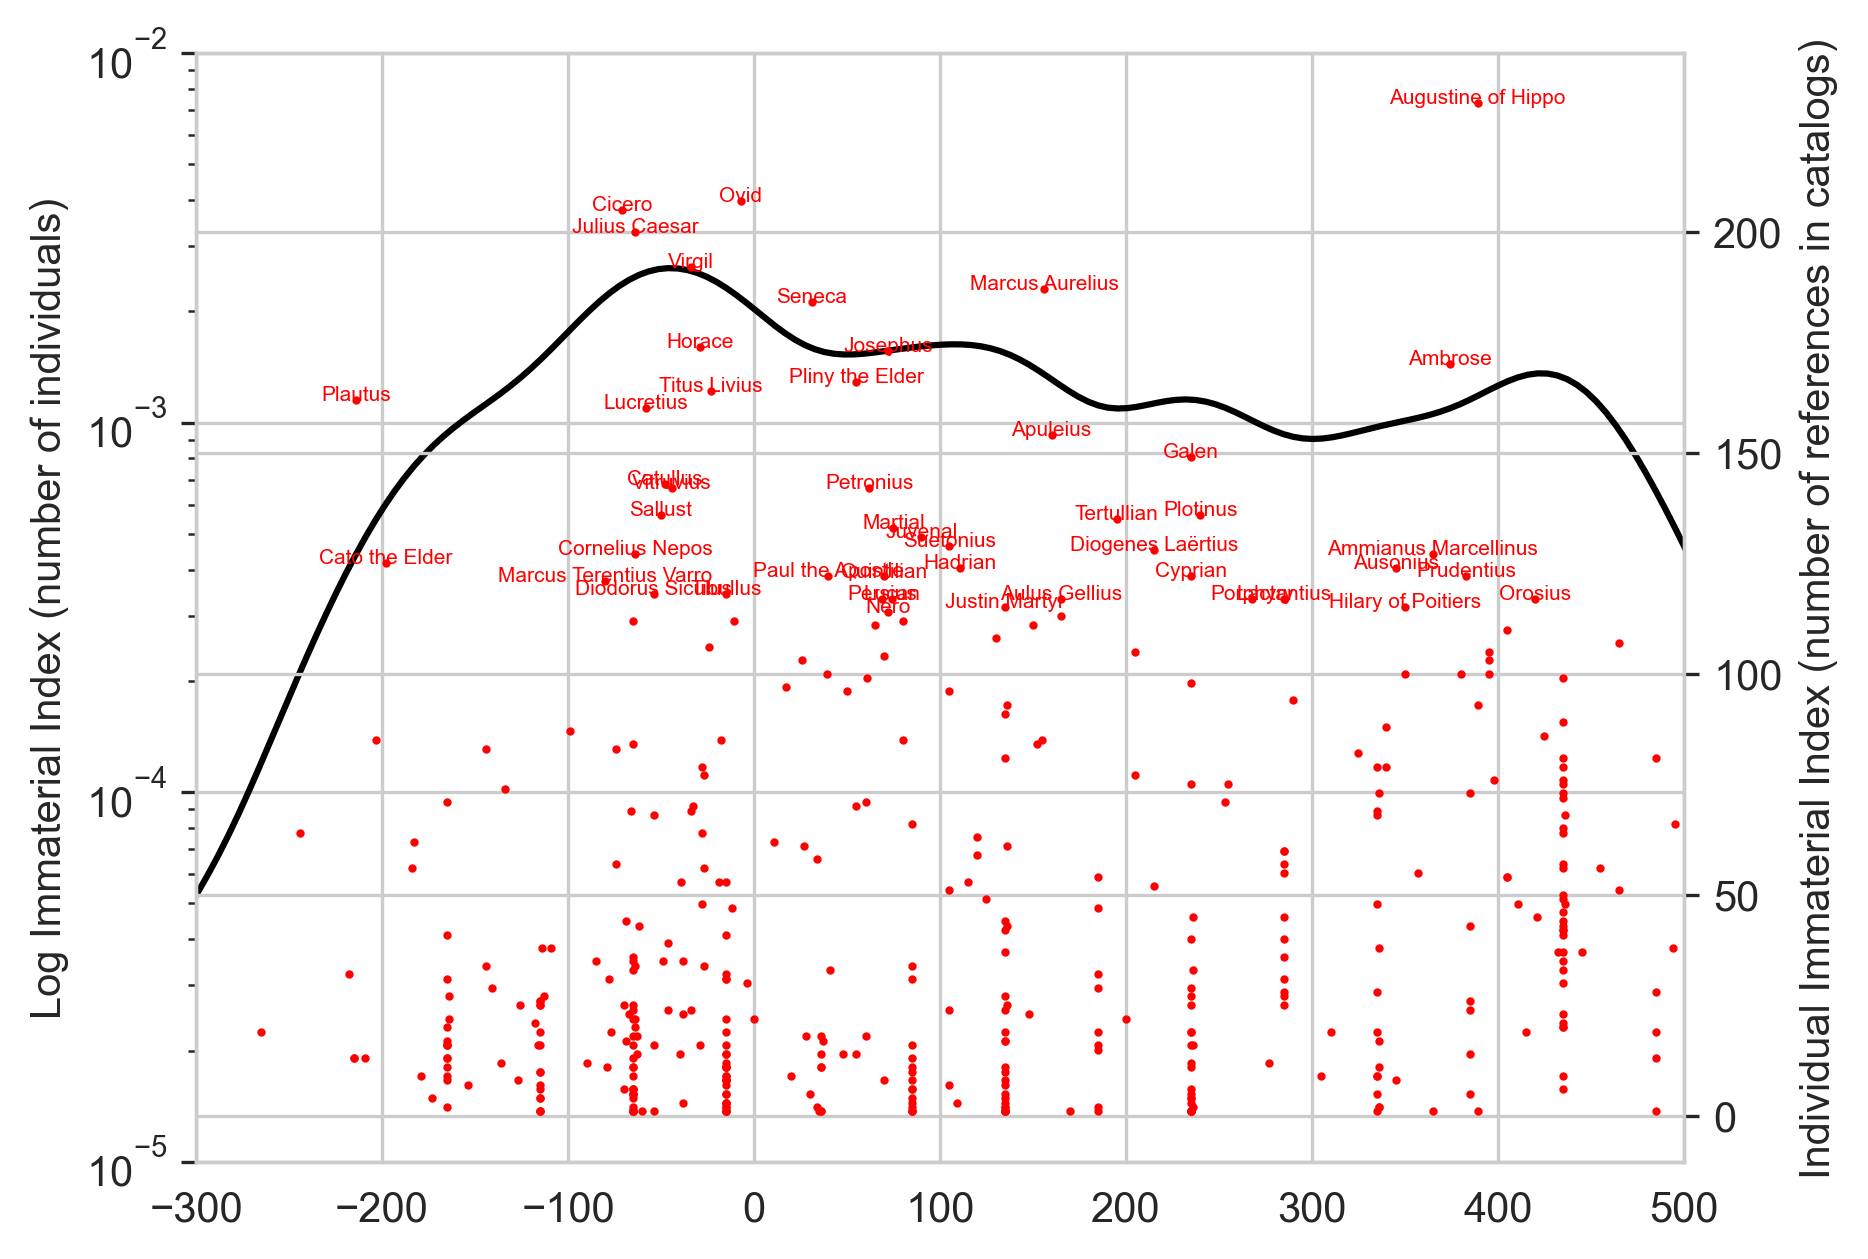

In [68]:
fig, ax1 = plt.subplots(dpi=300)

sns.kdeplot(cultura_latin_world['birthyear_plus35'], color='black', bw_adjust=0.6, ax=ax1)
# Show the plot
ax1.set_yscale('log')
ax1.set_xlim(-300,500)
ax1.set_xticks(range(-300,600,100))
ax1.set_ylim(1e-5, 1e-2)
ax1.set_ylabel("Log Immaterial Index (number of individuals)")
ax1.set_xlabel("")

ax2 = ax1.twinx()
max = cultura_greek_world["identifier_score"].max()
plt.scatter(cultura_latin_world["birthyear_plus35"], cultura_latin_world["identifier_score"], color="red", s=1)
for i, txt in enumerate(cultura_latin_world["individual_name_x"]):
    if cultura_latin_world["identifier_score"].iloc[i] > (max/2):
        ax2.annotate(txt, (cultura_latin_world["birthyear_plus35"].iloc[i], cultura_latin_world["identifier_score"].iloc[i]), ha="center", fontsize=5, color="red")
ax2.set_ylabel("Individual Immaterial Index (number of references in catalogs)")

#ax.set_ylabel("Individual Immaterial Index (number of references in catalogs)")

In [69]:
fig.savefig("am_figures/cultura_latin_world.png")

## Epigraphic data

In [32]:
# download and load the epigraphic data
try:
    LIST = gpd.read_parquet("large_files/LIST_v1-2.parquet")
    GIST = gpd.read_parquet("large_files/GIST_v1-1.parquet")
except:
    !curl https://zenodo.org/records/10473706/files/LIST_v1-2.parquet -o large_files/LIST_v1-2.parquet
    !curl https://zenodo.org/records/10139110/files/GIST_v1-1.parquet -o large_files/GIST_v1-1.parquet
    LIST = gpd.read_parquet("large_files/LIST_v1-2.parquet")
    GIST = gpd.read_parquet("large_files/GIST_v1-1.parquet")

In [33]:
print(len(GIST))
print(len(LIST))

217863
525870


In [34]:
GIST = GIST[GIST["is_geotemporal"]==True]
LIST = LIST[LIST["is_geotemporal"]==True]
print(len(GIST))
print(len(LIST))

106898
206570


In [35]:
LIST["random_dates"] = LIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)
GIST["random_dates"] = GIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)

In [36]:
greek_world_gdf = gpd.read_file("greek_world_gdf.geojson", driver="GeoJSON")
greek_world_uu = greek_world_gdf.geometry.unary_union

latin_world_gdf = gpd.read_file("latin_world_gdf.geojson", driver="GeoJSON")
latin_world_uu = latin_world_gdf.geometry.unary_union

(-8.144582351807436, 51.855417648192564, 6.267360648000015, 66.26736064800002)

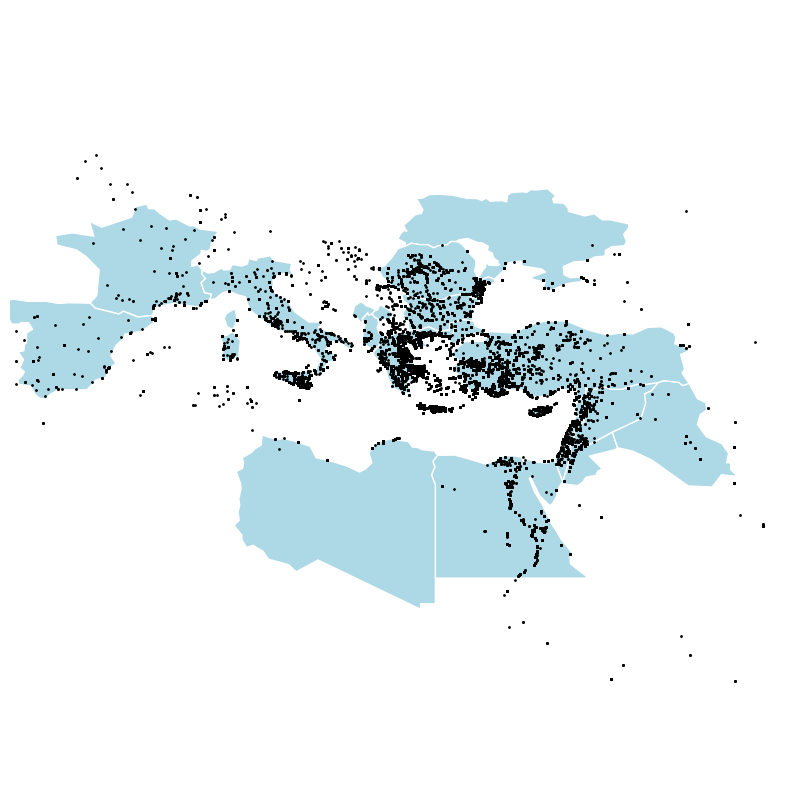

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

greek_world_gdf.plot(ax=ax, color="lightblue")
GIST.plot(ax=ax, markersize=1, color="black")

# Calculate the centroid of the region's geometries
region_centroid = greek_world_gdf.geometry.unary_union.centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

(-26.91322221063255, 48.08677778936745, 7.571577037932457, 67.57157703793246)

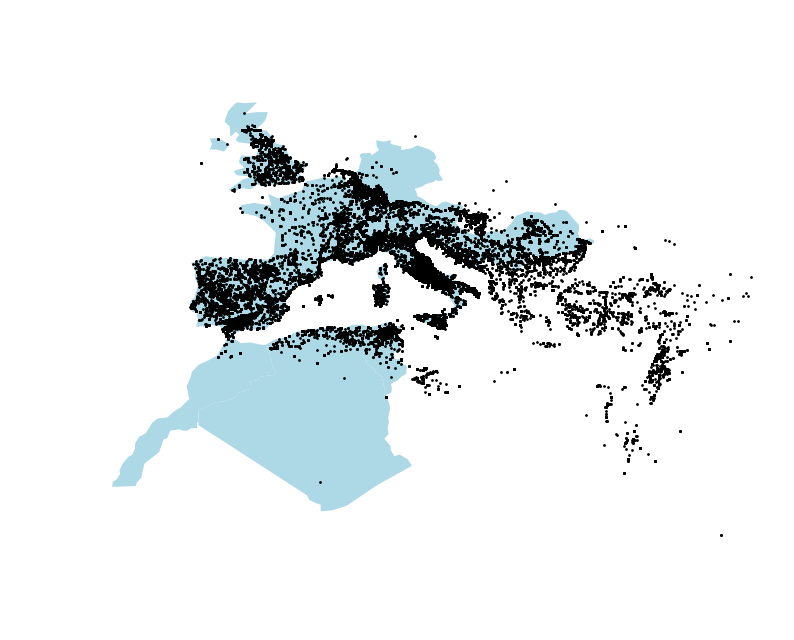

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

latin_world_gdf.plot(ax=ax, color="lightblue")
LIST.plot(ax=ax, markersize=1, color="black")

# Calculate the centroid of the region's geometries
region_centroid = latin_world_gdf.geometry.unary_union.centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n * 1.5])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

In [46]:
latin_world_gdf

,pop_est,continent,name,iso_a3,gdp_md_est,region,region_code,min_date,max_date,geometry
0,67059887.0,Europe,France,FRA,2715518,Latin World,re_latin,-100.0,500.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
1,11694719.0,Africa,Tunisia,TUN,38796,Latin World,re_latin,-100.0,500.0,"POLYGON ((9.48214 30.30756, 9.05560 32.10269, ..."
2,43053054.0,Africa,Algeria,DZA,171091,Latin World,re_latin,-100.0,500.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,8877067.0,Europe,Austria,AUT,445075,Latin World,re_latin,-100.0,500.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
4,19356544.0,Europe,Romania,ROU,250077,Latin World,re_latin,-100.0,500.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."
5,83132799.0,Europe,Germany,DEU,3861123,Latin World,re_latin,-100.0,500.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
6,4067500.0,Europe,Croatia,HRV,60752,Latin World,re_latin,-100.0,500.0,"POLYGON ((16.56481 46.50375, 16.88252 46.38063..."
7,8574832.0,Europe,Switzerland,CHE,703082,Latin World,re_latin,-100.0,500.0,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ..."
8,619896.0,Europe,Luxembourg,LUX,71104,Latin World,re_latin,-100.0,500.0,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ..."
9,11484055.0,Europe,Belgium,BEL,533097,Latin World,re_latin,-100.0,500.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ..."


In [44]:
GIST = gpd.sjoin(GIST, greek_world_gdf, predicate='within', how='left')
LIST = gpd.sjoin(LIST, latin_world_gdf, predicate='within', how='left')


In [50]:
(LIST["name"]=="Italy").sum()

125375

In [74]:
def filter_by_country_temporal_inclusion(row):
    try:
        not_before = row["not_before"]
        not_after = row["not_after"]
        if pd.isna(not_before):
            not_before = float('-inf')
        if pd.isna(not_after):
            not_after = float('inf')
        return (not_before <= row["max_date"]) & (not_after >= row["min_date"])
    except:
        return False
GIST["inscr_greek_world"] = GIST.apply(lambda x: filter_by_country_temporal_inclusion(x), axis=1)
LIST["inscr_latin_world"] = LIST.apply(lambda x: filter_by_country_temporal_inclusion(x), axis=1)

In [75]:
# how many Greek inscriptions from the Greek World are there?
GIST["inscr_greek_world"].sum()

75499

In [76]:
# what proportion of GIST inscriptions is from the Greek World covered here?
GIST["inscr_greek_world"].sum() / len(GIST)

0.7062713989036278

In [77]:
# how many Latin inscriptions from the Latin World are there?
LIST["inscr_latin_world"].sum()

183205

In [78]:
# what proportion of LIST inscriptions is from the Latin World covered here?
LIST["inscr_latin_world"].sum() / len(LIST)

0.8868906423972504

(-8.144582351807436, 51.855417648192564, 6.267360648000015, 66.26736064800002)

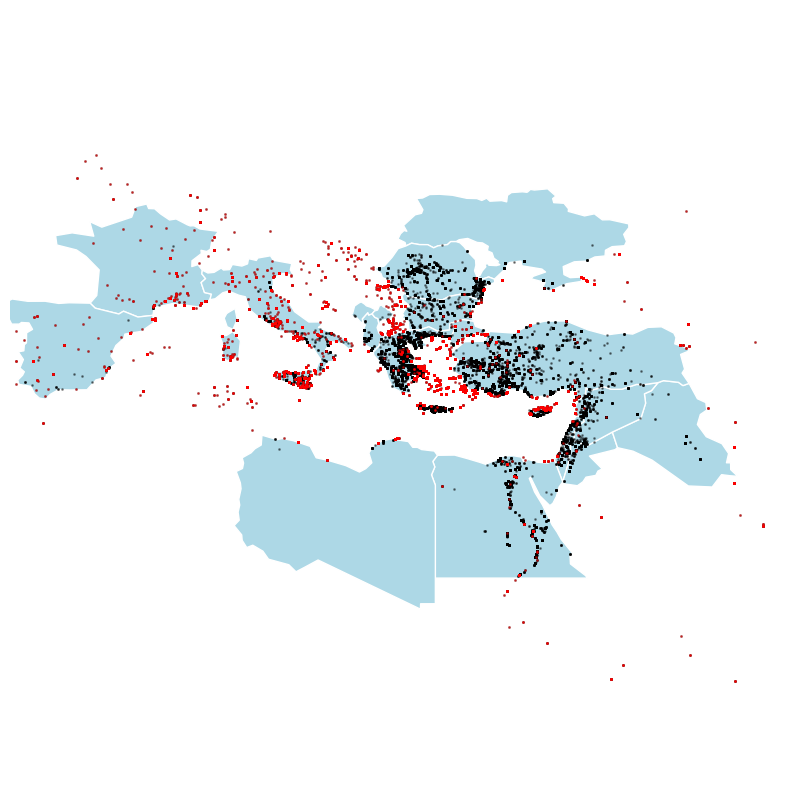

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

greek_world_gdf.plot(ax=ax, color="lightblue")
GIST.plot(ax=ax, markersize=1, color="black", alpha=0.4)
GIST[~GIST["inscr_greek_world"]].plot(ax=ax, markersize=1, color="red", alpha=0.4)


# Calculate the centroid of the region's geometries
region_centroid = greek_world_gdf.geometry.unary_union.centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

In [86]:
fig.savefig("am_figures/greek_world_inscriptions.png")

(-16.91322221063255, 33.08677778936745, 17.571577037932457, 57.57157703793246)

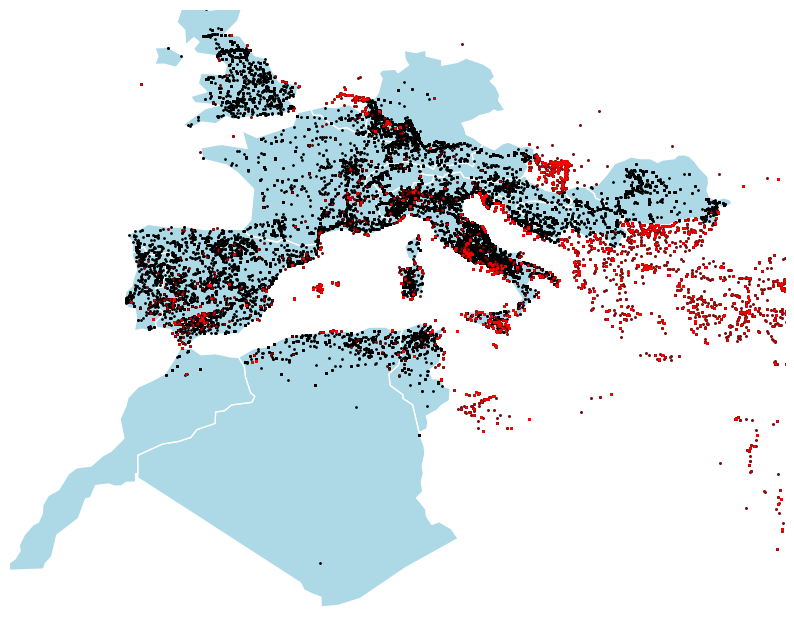

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

latin_world_gdf.plot(ax=ax, color="lightblue")
LIST.plot(ax=ax, markersize=1, color="black")
LIST[~LIST["inscr_latin_world"]].plot(ax=ax, markersize=1, color="red", alpha=0.4)

# Calculate the centroid of the region's geometries
region_centroid = latin_world_gdf.geometry.unary_union.centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 20
ax.set_xlim([region_centroid.x - n, region_centroid.x + n * 1.5])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

In [90]:
fig.savefig("am_figures/latin_world_inscriptions.png")

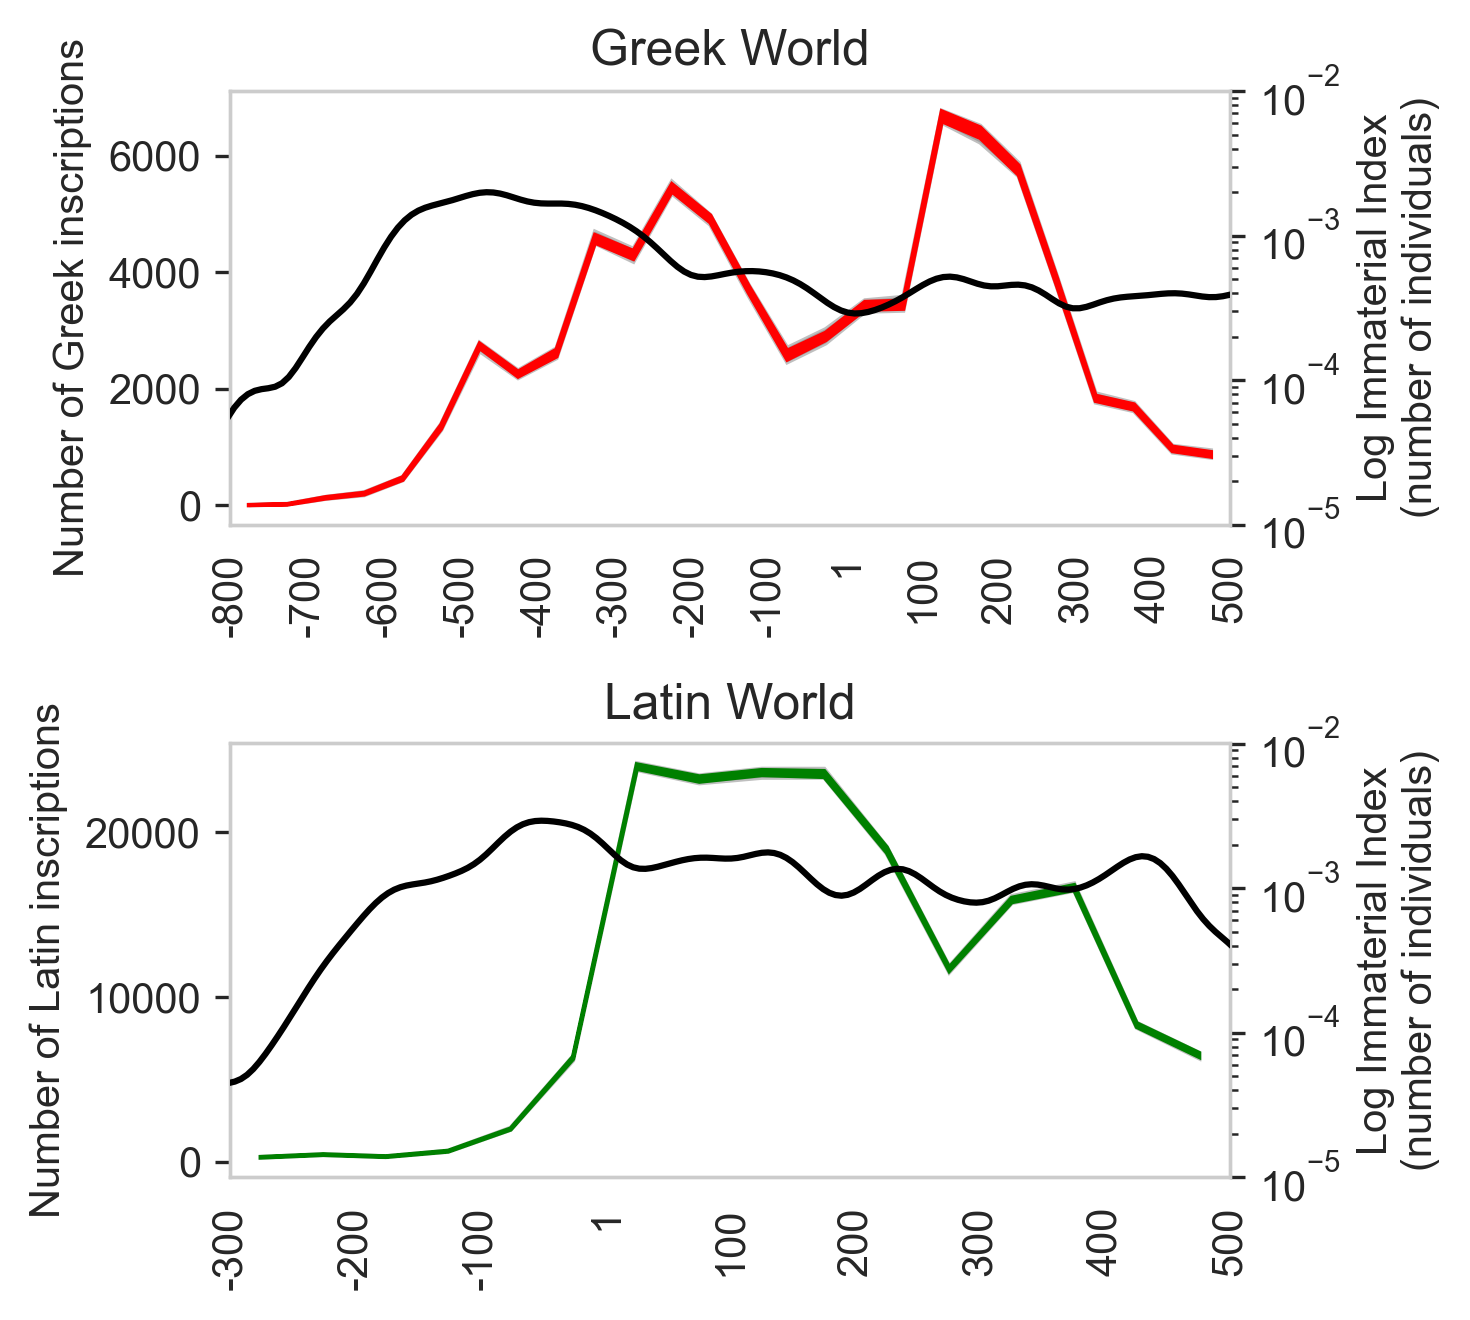

In [119]:
fig, [ax1, ax3] = plt.subplots(2,1, figsize=(5,4.5), dpi=300, tight_layout=True)

ax1.set_title("Greek World")
tempun.timeblocksplot_from_randoms(GIST[GIST["inscr_greek_world"]]["random_dates"], color="red", timeblocks=[-800,500,50], ax=ax1, zorder=2)
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index\n(number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

ax3.set_title("Latin World")
tempun.timeblocksplot_from_randoms(LIST[LIST["inscr_latin_world"]]["random_dates"], color="green", timeblocks=[-300,500,50], ax=ax3, zorder=2)
ax3.set_xlim(-300,500)
xticks = [n + 1 if n==0 else n for n in range(-300, 600, 100) ]
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(n) for n in xticks], rotation=90)
ax3.set_ylabel("Number of Latin inscriptions")

ax3.grid(False) # put grids behind


ax4 = ax3.twinx()

sns.kdeplot(cultura_latin_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax4, zorder=10)
# Show the plot
ax4.set_yscale('log')
ax4.set_ylim(1e-5, 1e-2)
ax4.set_ylabel("Log Immaterial Index\n(number of individuals)")
ax4.set_xlabel("")
ax4.grid(False) # turn off gridlines

In [116]:
fig.savefig("am_figures/greek&latin_world_cultura&inscriptions")

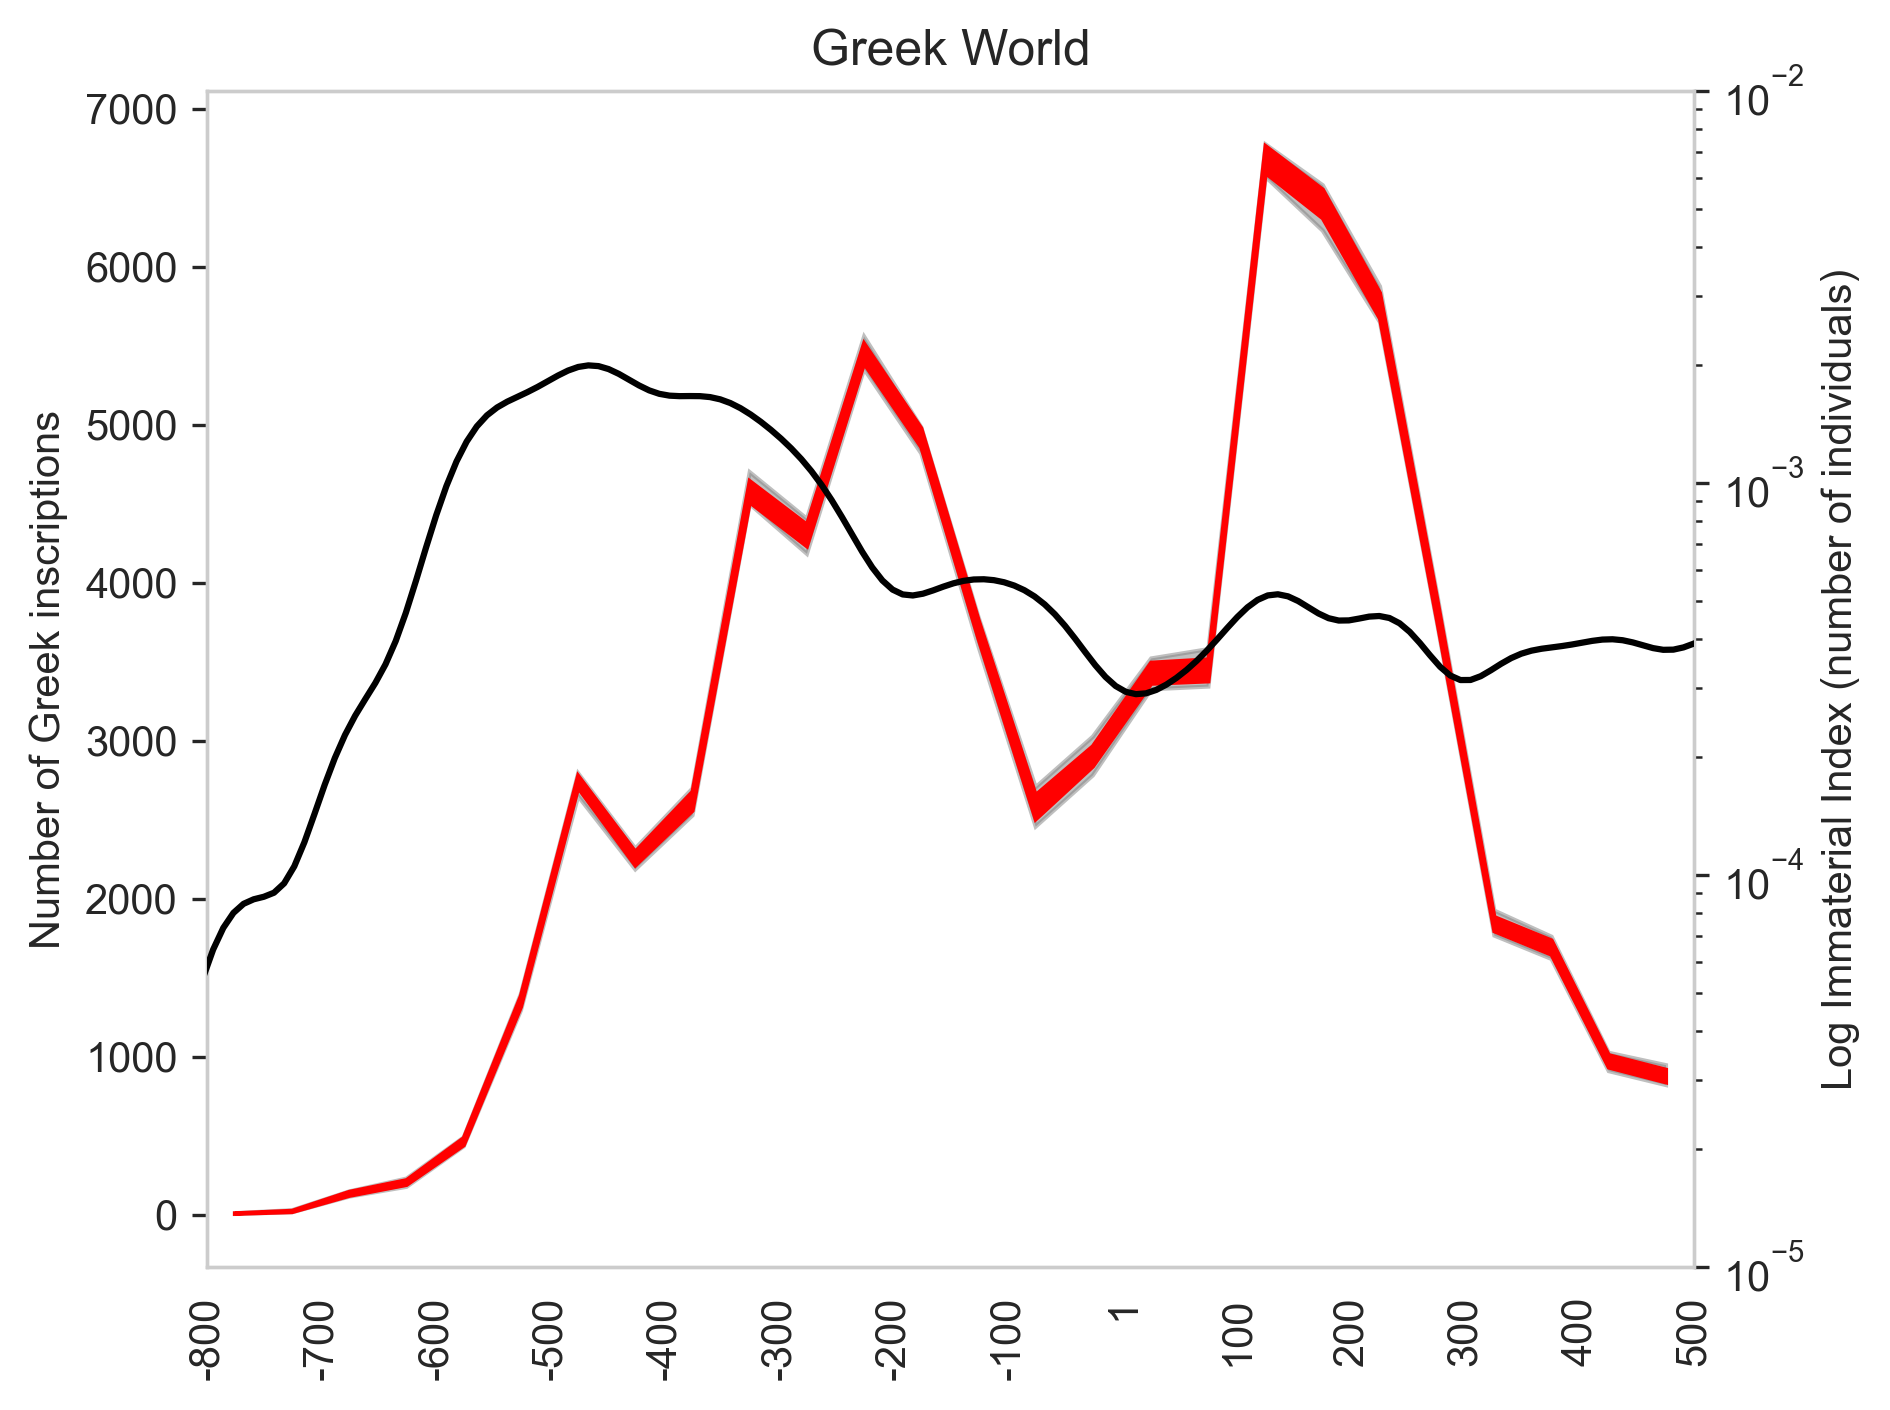

In [123]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

ax1.set_title("Greek World")
tempun.timeblocksplot_from_randoms(GIST[GIST["inscr_greek_world"]]["random_dates"], color="red", timeblocks=[-800,500,50], ax=ax1, zorder=2)
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

In [124]:
fig.savefig("am_figures/greek_world_cultura&inscriptions")

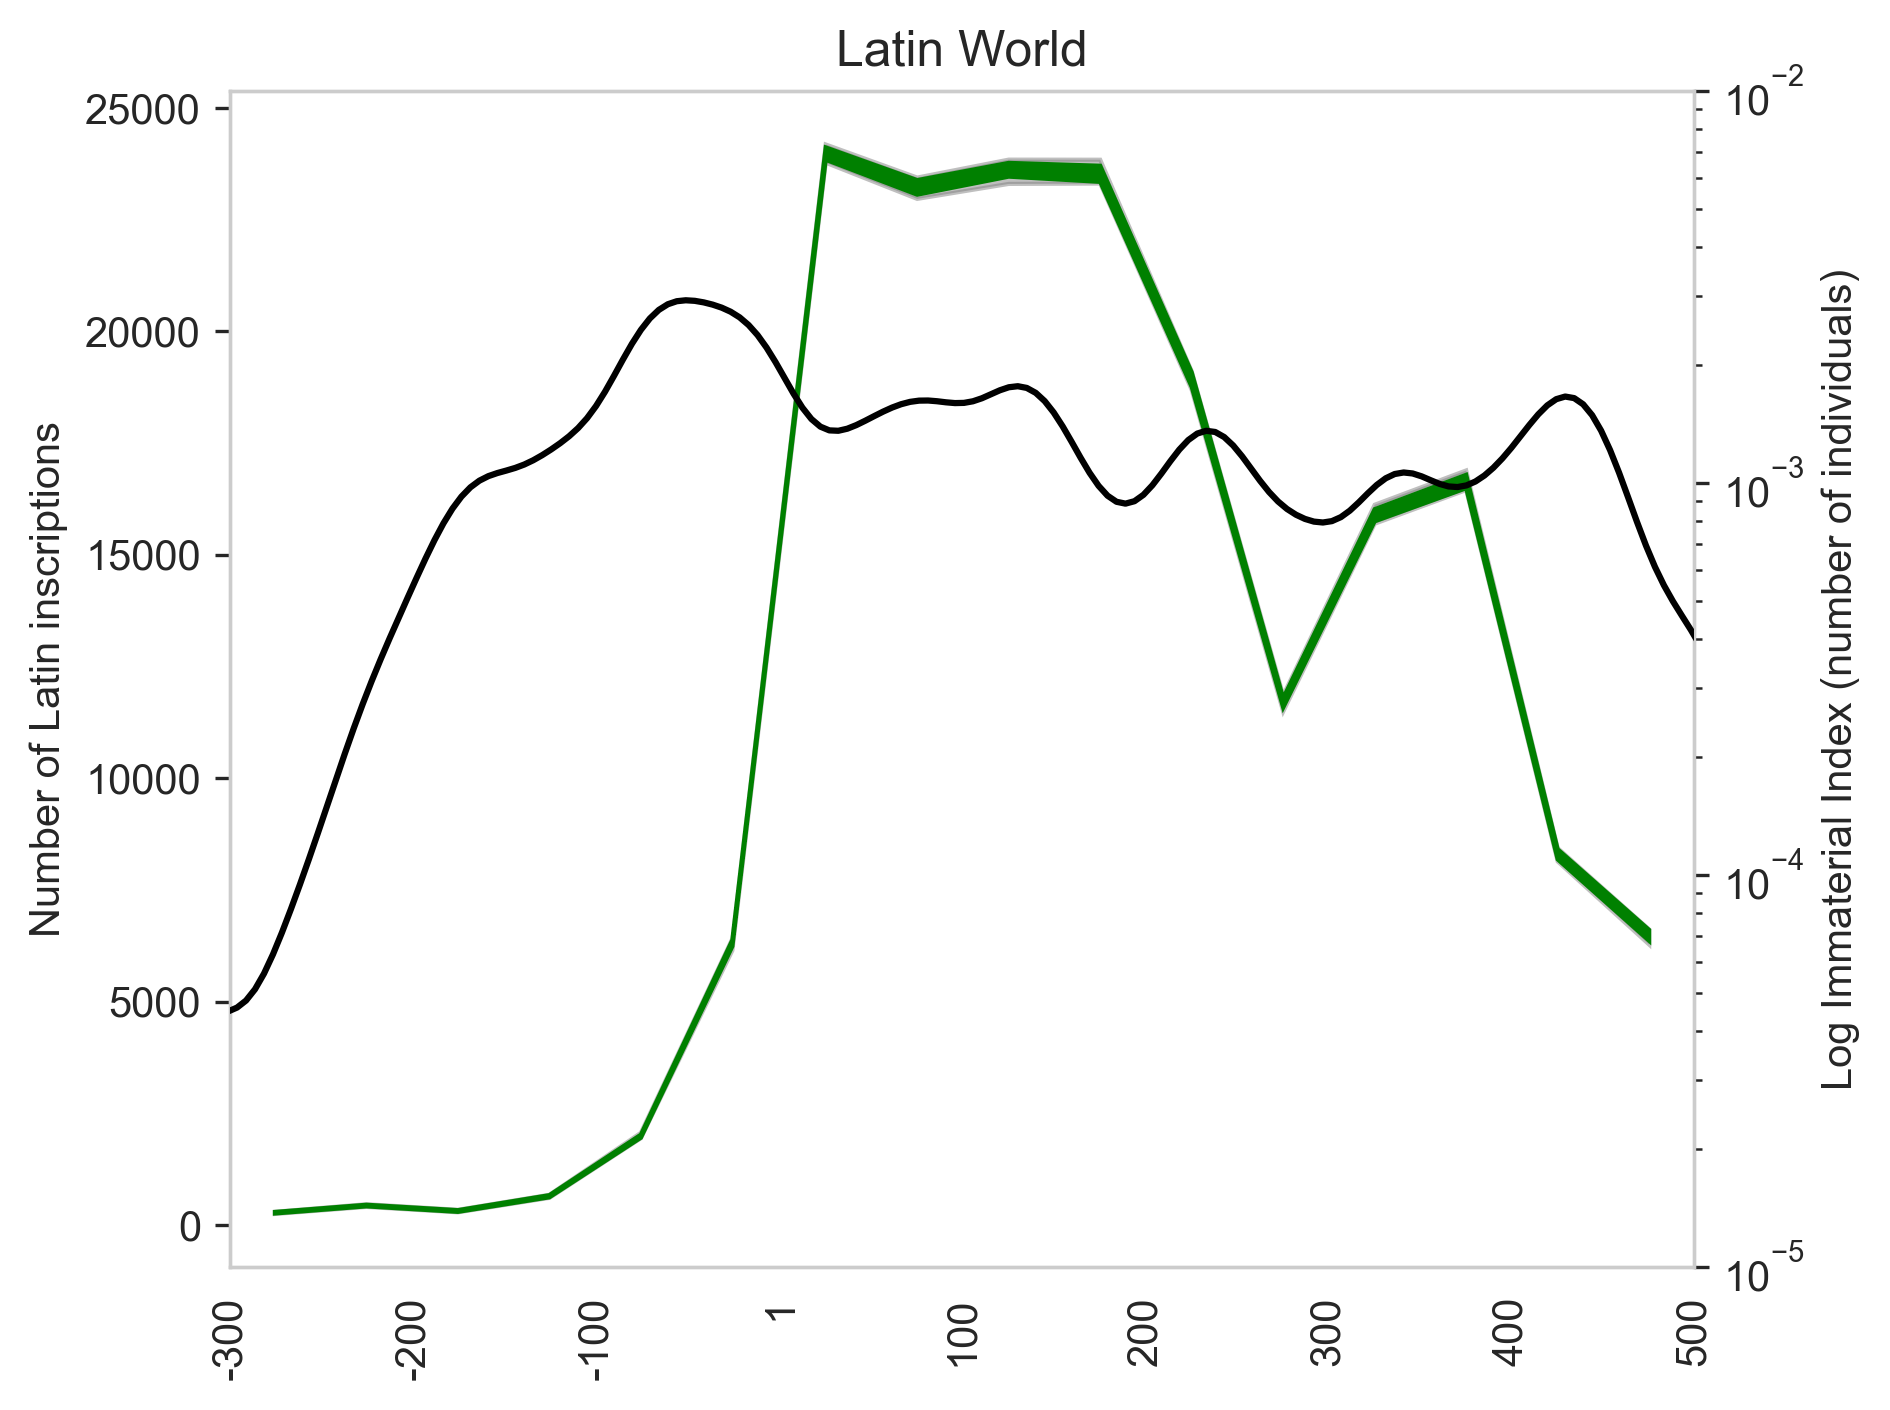

In [127]:
fig, ax3 = plt.subplots(dpi=300, tight_layout=True)

ax3.set_title("Latin World")
tempun.timeblocksplot_from_randoms(LIST[LIST["inscr_latin_world"]]["random_dates"], color="green", timeblocks=[-300,500,50], ax=ax3, zorder=2)
ax3.set_xlim(-300,500)
xticks = [n + 1 if n==0 else n for n in range(-300, 600, 100) ]
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(n) for n in xticks], rotation=90)
ax3.set_ylabel("Number of Latin inscriptions")

ax3.grid(False) # put grids behind


ax4 = ax3.twinx()

sns.kdeplot(cultura_latin_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax4, zorder=10)
# Show the plot
ax4.set_yscale('log')
ax4.set_ylim(1e-5, 1e-2)
ax4.set_ylabel("Log Immaterial Index (number of individuals)")
ax4.set_xlabel("")
ax4.grid(False) # turn off gridlines

In [128]:
fig.savefig("am_figures/latin_world_cultura&inscriptions")

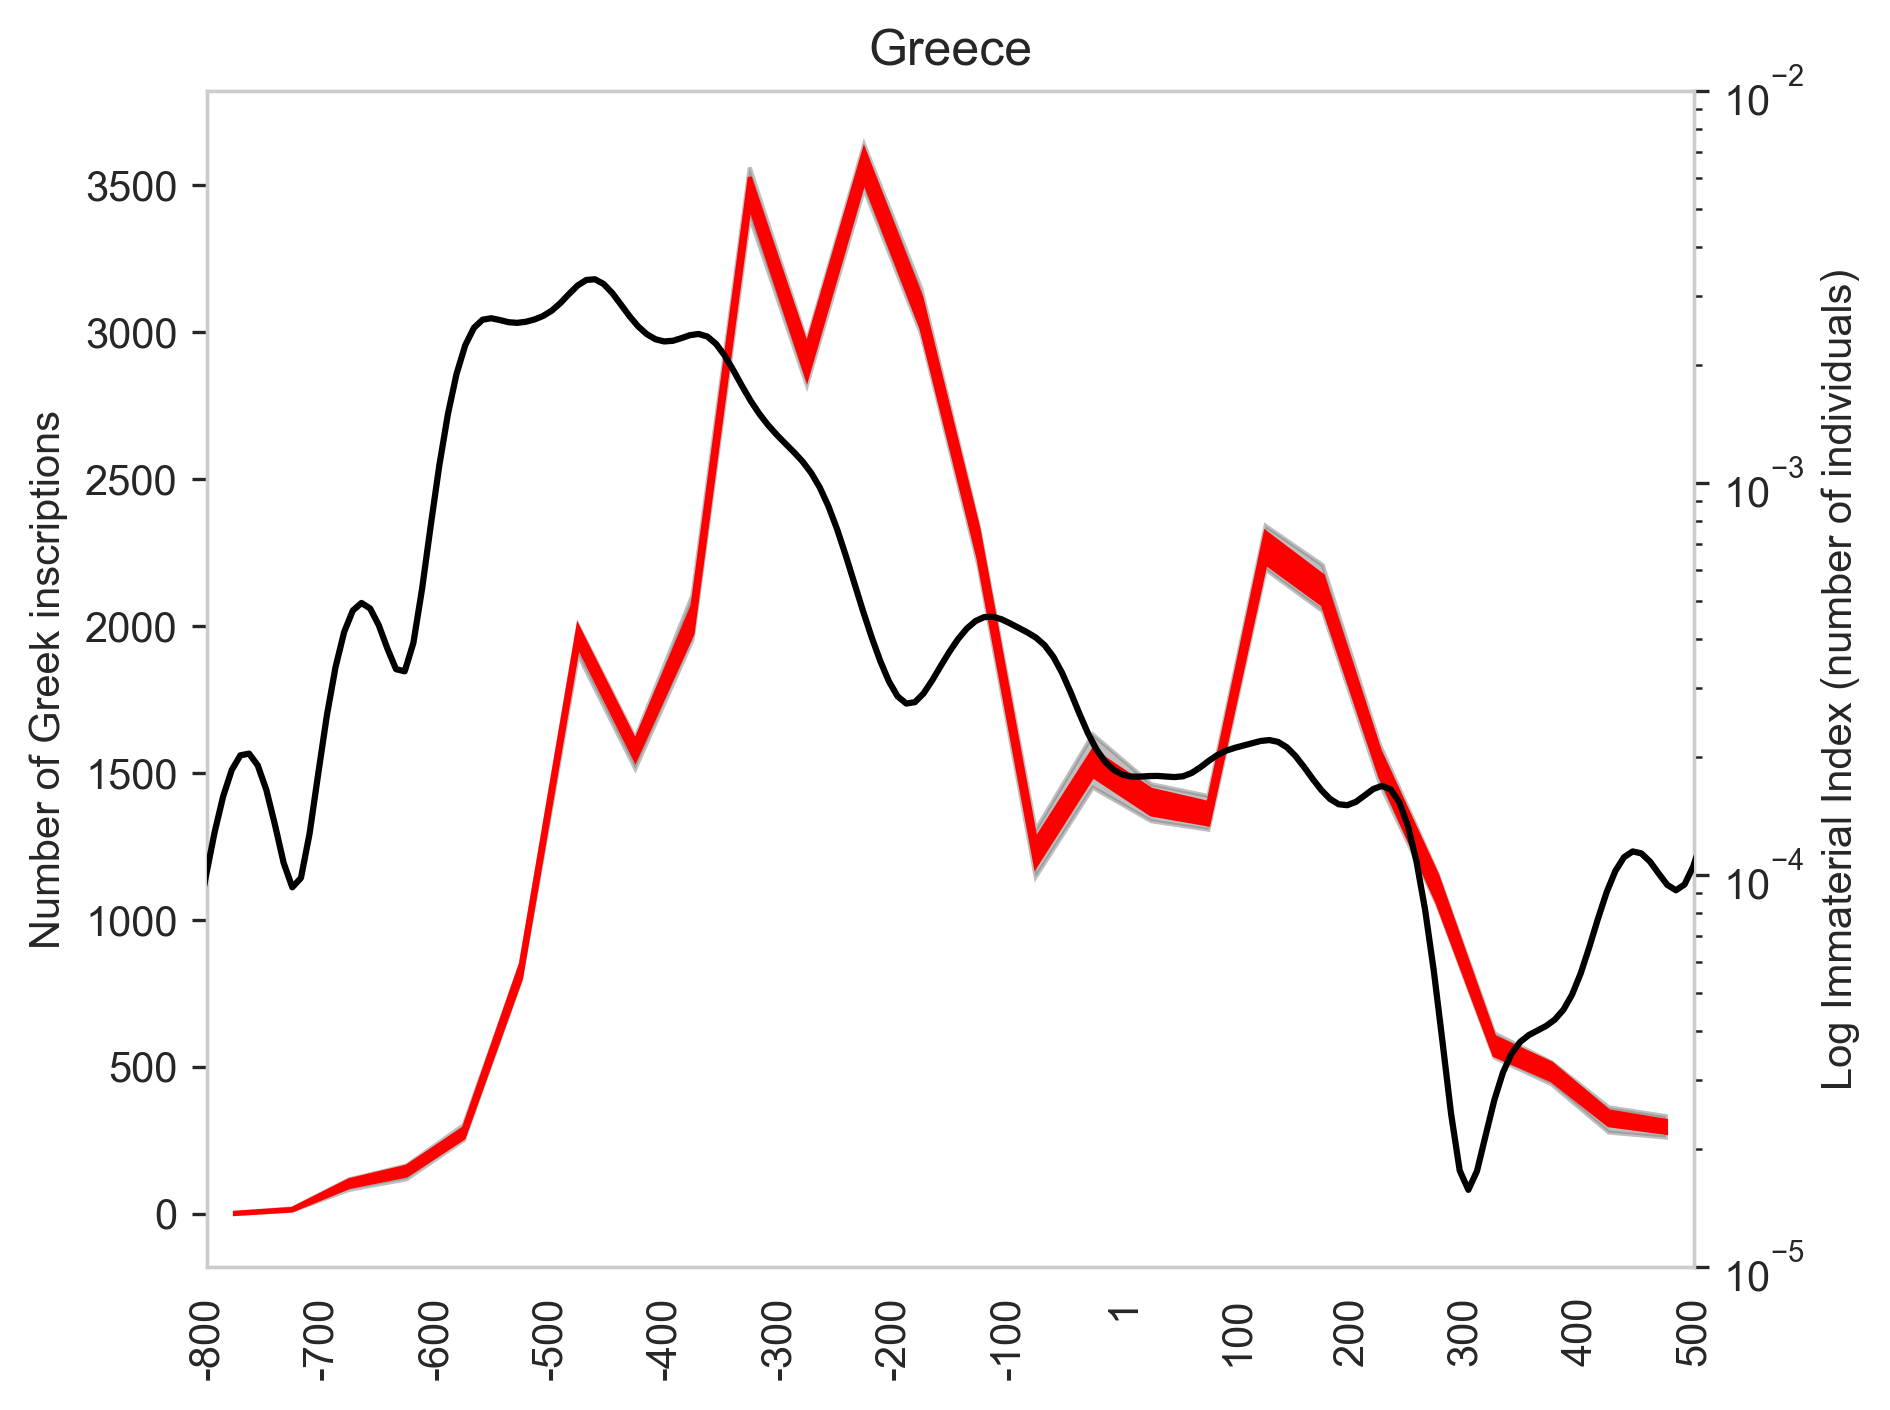

In [136]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

ax1.set_title("Greece")
tempun.timeblocksplot_from_randoms(GIST[GIST["name"]=="Greece"]["random_dates"], color="red", timeblocks=[-800,500,50], ax=ax1, zorder=2)
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world[cultura_greek_world["country_name"]=="Greece"]['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines


In [132]:
fig.savefig("am_figures/greece_cultura&inscriptions")

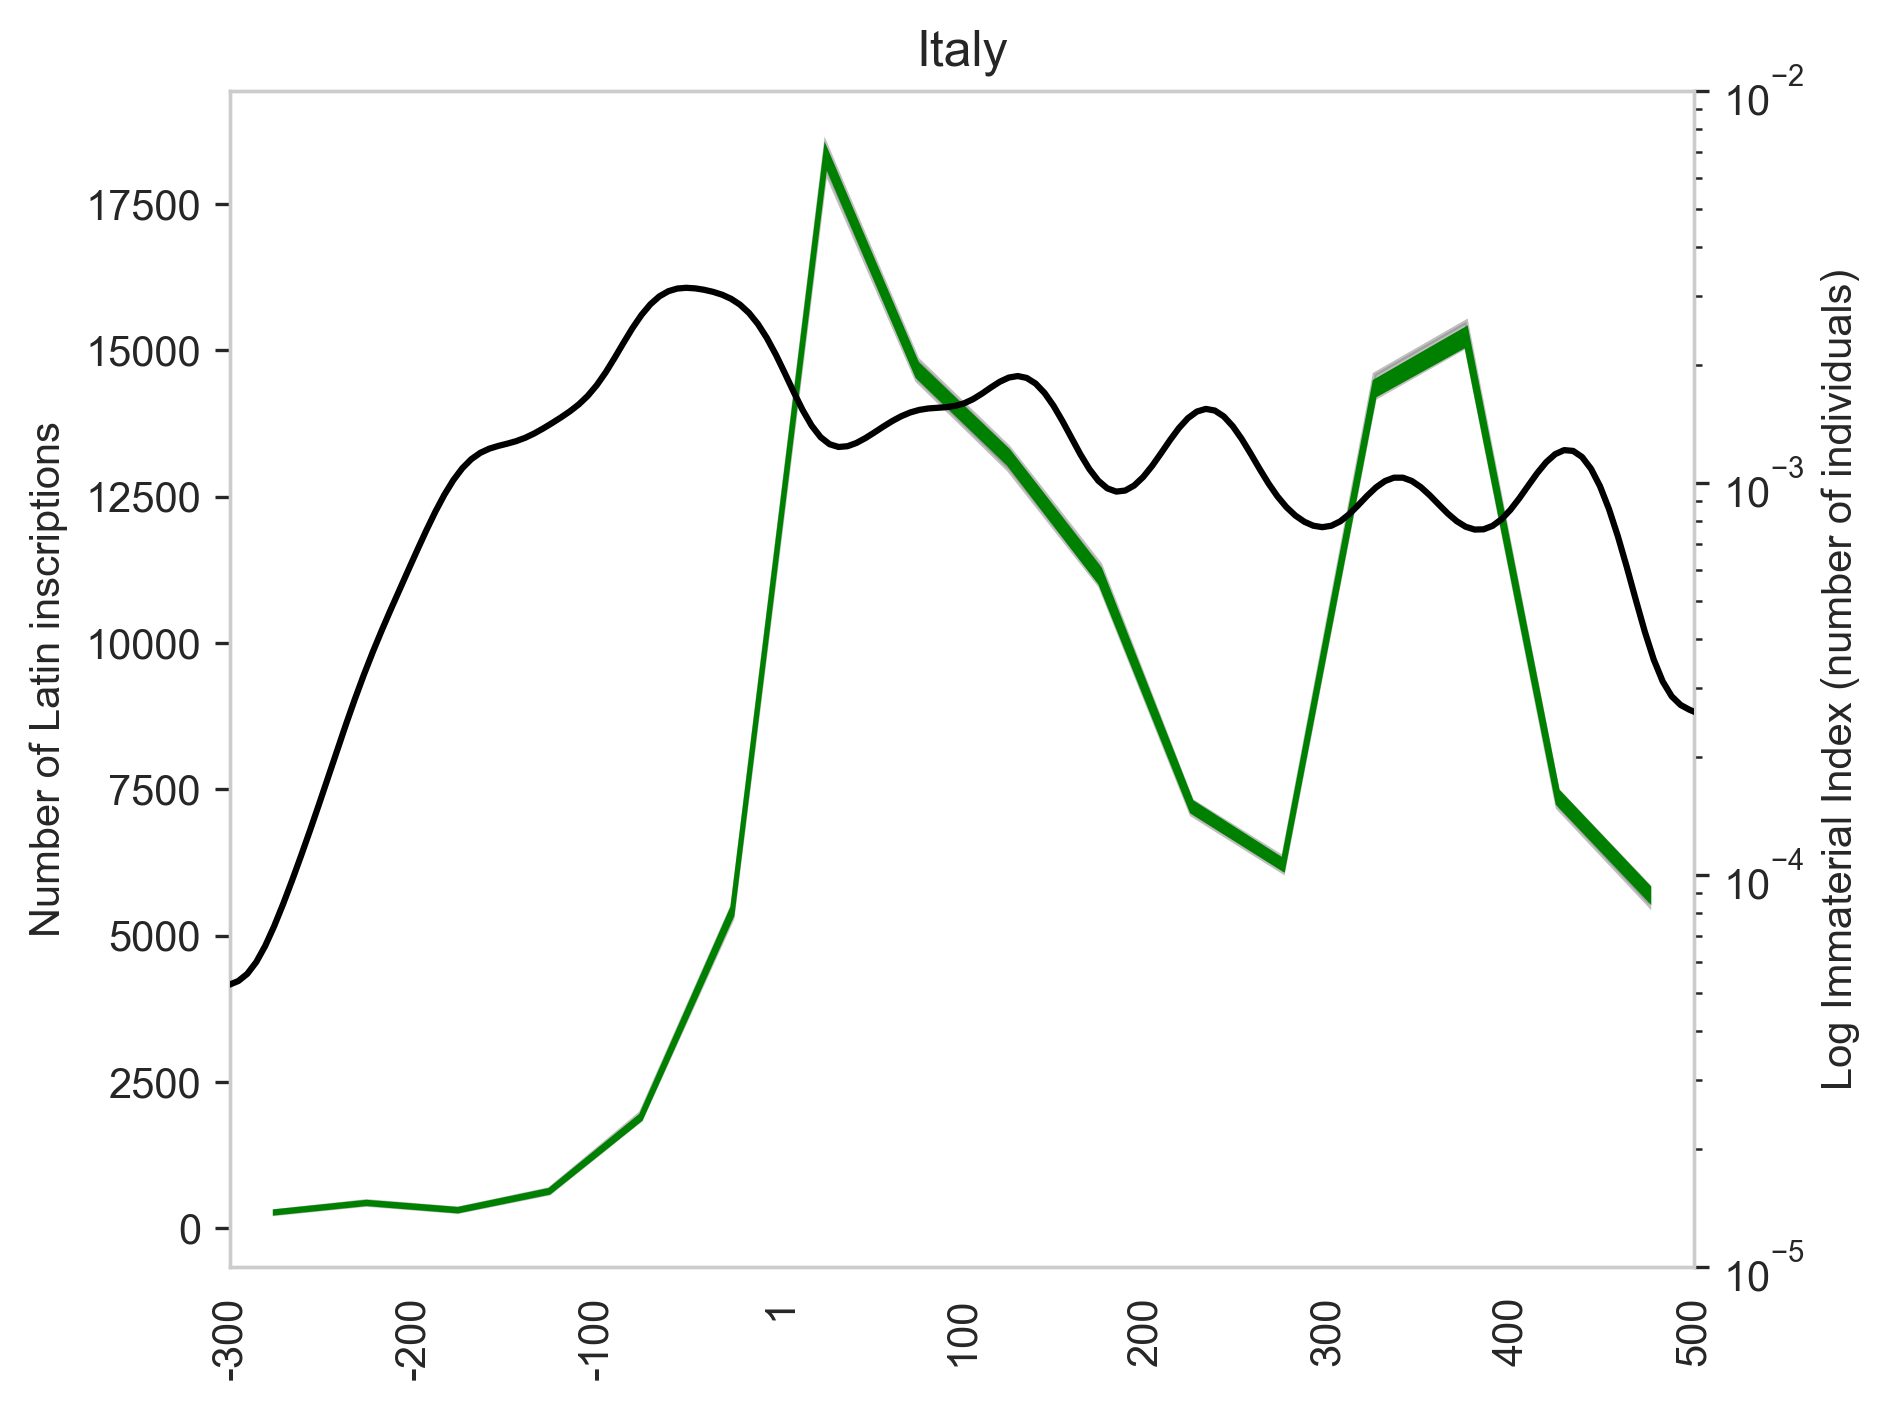

In [133]:
fig, ax3 = plt.subplots(dpi=300, tight_layout=True)

ax3.set_title("Italy")
tempun.timeblocksplot_from_randoms(LIST[LIST["name"]=="Italy"]["random_dates"], color="green", timeblocks=[-300,500,50], ax=ax3, zorder=2)
ax3.set_xlim(-300,500)
xticks = [n + 1 if n==0 else n for n in range(-300, 600, 100) ]
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(n) for n in xticks], rotation=90)
ax3.set_ylabel("Number of Latin inscriptions")

ax3.grid(False) # put grids behind


ax4 = ax3.twinx()

sns.kdeplot(cultura_latin_world[cultura_latin_world["country_name"]=="Italy"]['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax4, zorder=10)
# Show the plot
ax4.set_yscale('log')
ax4.set_ylim(1e-5, 1e-2)
ax4.set_ylabel("Log Immaterial Index (number of individuals)")
ax4.set_xlabel("")
ax4.grid(False) # turn off gridlines

In [134]:
fig.savefig("am_figures/italy_cultura&inscriptions")

In [137]:
development_index = pd.read_csv("https://raw.githubusercontent.com/kasev/EpiMR/master/data/ober_development-index.csv")
development_index.head(5)

,year,DI
0,-1300,1.2
1,-1200,1.2
2,-1100,0.8
3,-1000,0.4
4,-900,0.6


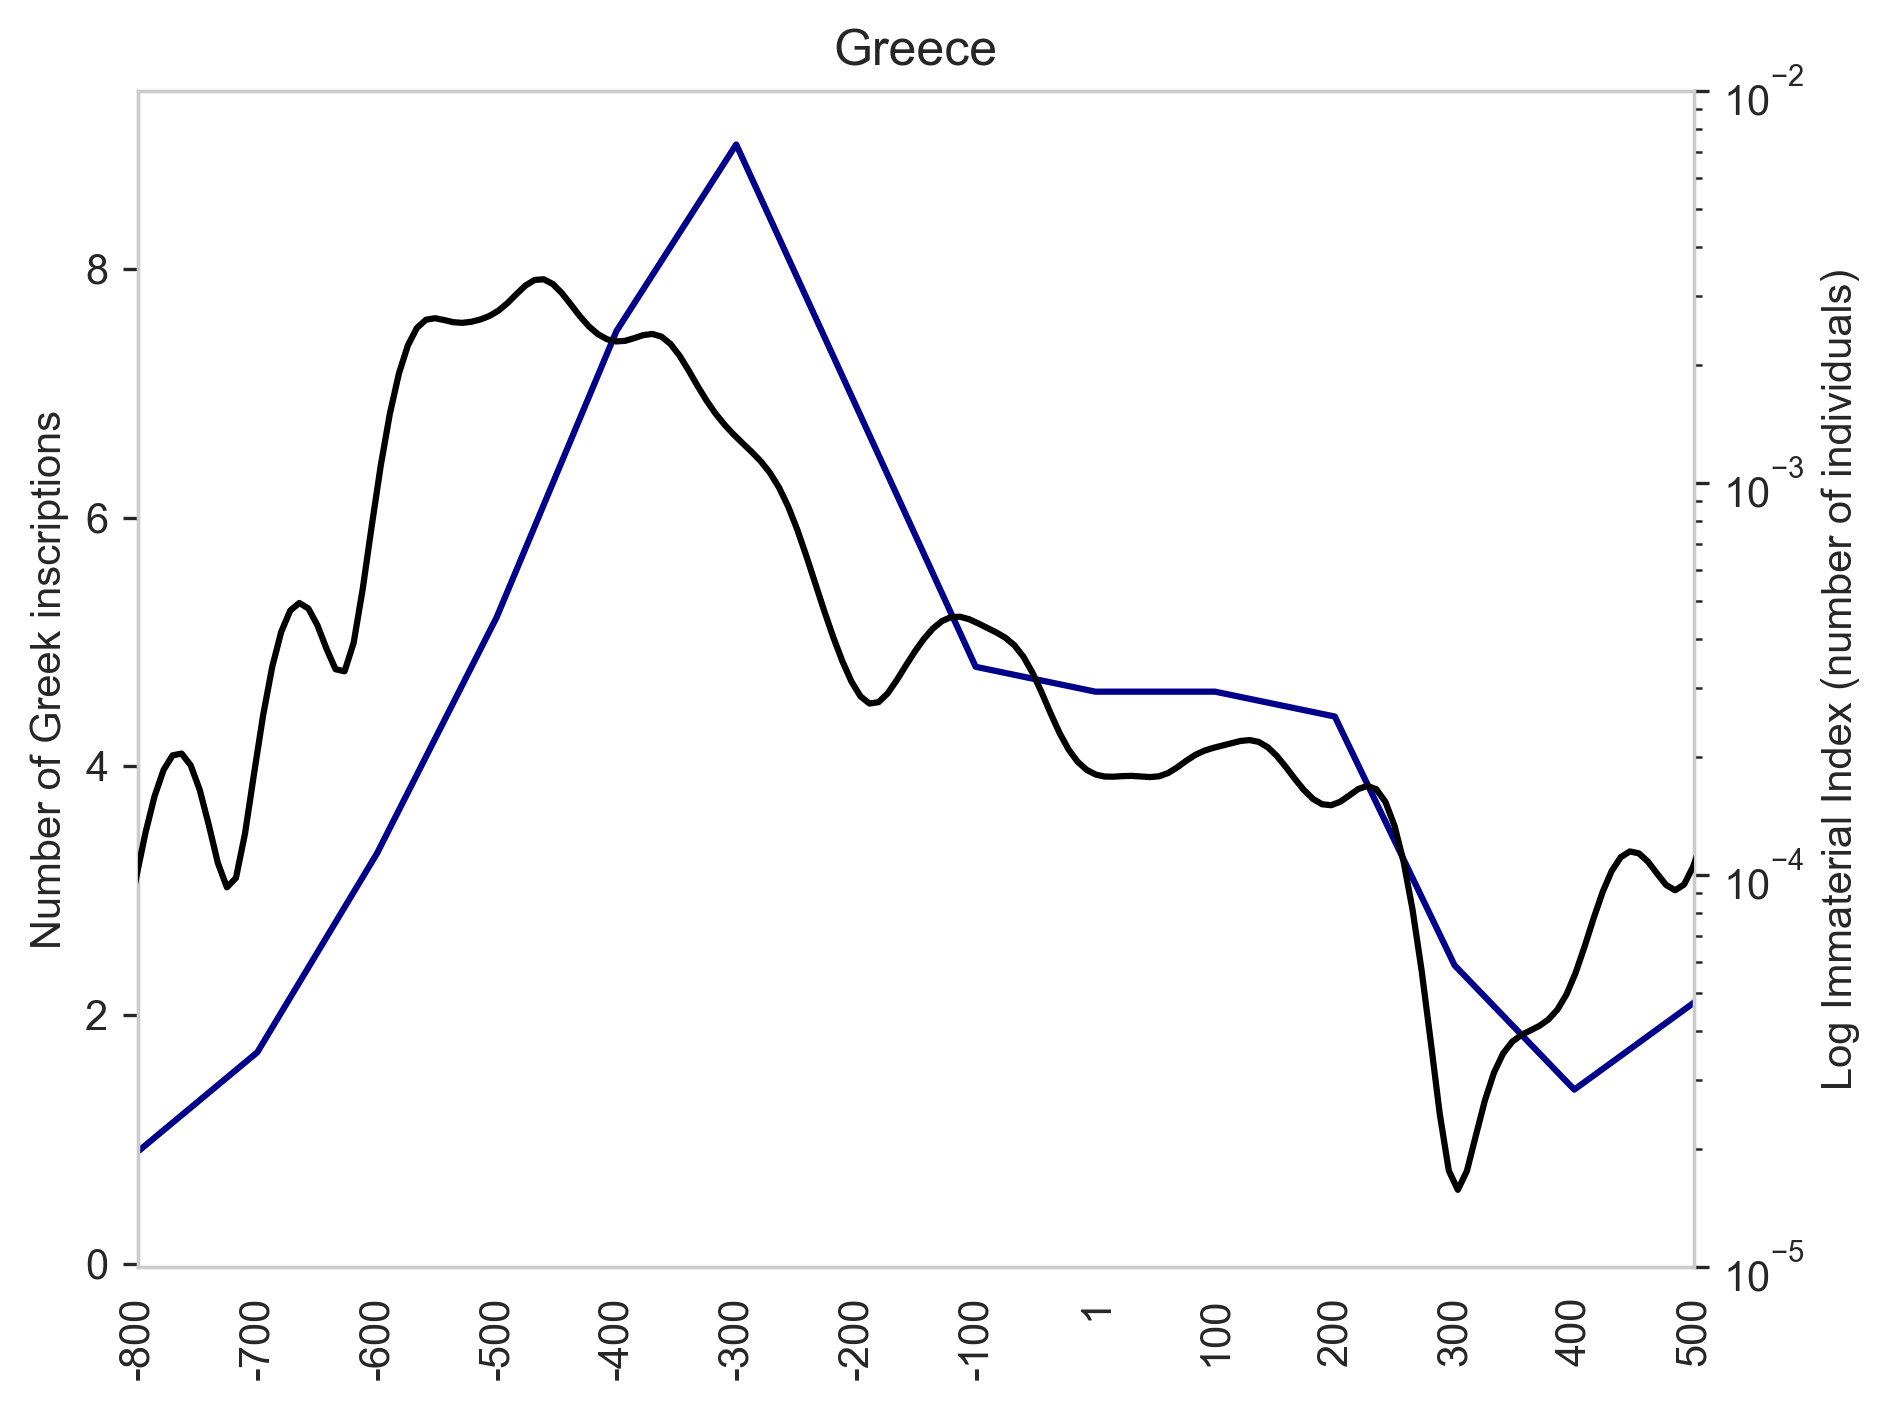

In [138]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

ax1.set_title("Greece")

ax1.plot(development_index["year"], development_index["DI"], color="darkblue")

ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world[cultura_greek_world["country_name"]=="Greece"]['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

In [139]:
fig.savefig("am_figures/greece_cultura&DI.png")

## Cultural Production, combining individual score and modeling temporal uncertainty

In [140]:
cultura_greek_world.head(5)

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,individual_name_y,region_code,region_name,not_before,not_after,random_dates,birthyear_plus35
301,Q1342867,Polykleitos the Younger,-400.0,-390--340,GRC,Greece,0.104834,11.0,Polykleitos the Younger,re_greek_world,Greek World,-390,-340,"[-346, -389, -352, -345, -367, -369, -390, -37...",-365.0
1066,Q197044,Zeuxis,-500.0,-490--440,GRC,Greece,0.116009,37.0,Zeuxis,re_greek_world,Greek World,-490,-440,"[-452, -445, -476, -443, -451, -487, -468, -44...",-465.0
2460,Q64320,Phradmon,-500.0,-490--440,GRC,Greece,0.102742,6.0,Phradmon,re_greek_world,Greek World,-490,-440,"[-448, -444, -462, -485, -461, -468, -458, -44...",-465.0
3079,Q298071,Hippodamus of Miletus,-497.0,-490--440,TUR,Turkey,0.119432,48.0,Hippodamus of Miletus,re_greek_world,Greek World,-490,-440,"[-479, -452, -465, -476, -482, -462, -477, -47...",-462.0
3632,Q332802,Ibycus,-600.0,-590--540,GRC,Greece,0.116928,53.0,Ibycus,re_greek_world,Greek World,-590,-540,"[-580, -554, -588, -570, -554, -544, -552, -54...",-565.0


In [151]:
cultura_greek_world[cultura_greek_world["individual_name_x"]=="Plato"]

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,individual_name_y,region_code,region_name,not_before,not_after,random_dates,birthyear_plus35
133831,Q859,Plato,-426.0,-420--370,GRC,Greece,0.825880,226.0,Plato,re_greek_world,Greek World,-420,-370,"[-390, -412, -400, -374, -396, -371, -401, -38...",-391.0
157474,Q446098,Plato,-499.0,-490--440,GRC,Greece,0.103957,19.0,Plato,re_greek_world,Greek World,-490,-440,"[-475, -462, -487, -477, -469, -460, -469, -47...",-464.0


In [141]:
def combine_individual_scores(timeblock_df):
    return timeblock_df["identifier_score"].sum()

cumulative_identifier_score = tempun.sim_data_by_function(cultura_greek_world, 100, [-800, 500, 50], combine_individual_scores)

In [142]:
cumulative_identifier_score[0]

[((-800, -751), 216.0),
 ((-750, -701), 0.0),
 ((-700, -651), 258.0),
 ((-650, -601), 283.0),
 ((-600, -551), 1362.0),
 ((-550, -501), 953.0),
 ((-500, -451), 2682.0),
 ((-450, -401), 2609.0),
 ((-400, -351), 2327.0),
 ((-350, -301), 1448.0),
 ((-300, -251), 1855.0),
 ((-250, -201), 888.0),
 ((-200, -151), 604.0),
 ((-150, -101), 688.0),
 ((-100, -51), 484.0),
 ((-50, -1), 298.0),
 ((1, 50), 661.0),
 ((51, 100), 839.0),
 ((101, 150), 1650.0),
 ((151, 200), 633.0),
 ((201, 250), 1268.0),
 ((251, 300), 474.0),
 ((301, 350), 922.0),
 ((351, 400), 1170.0),
 ((401, 450), 1439.0),
 ((451, 500), 500.0)]

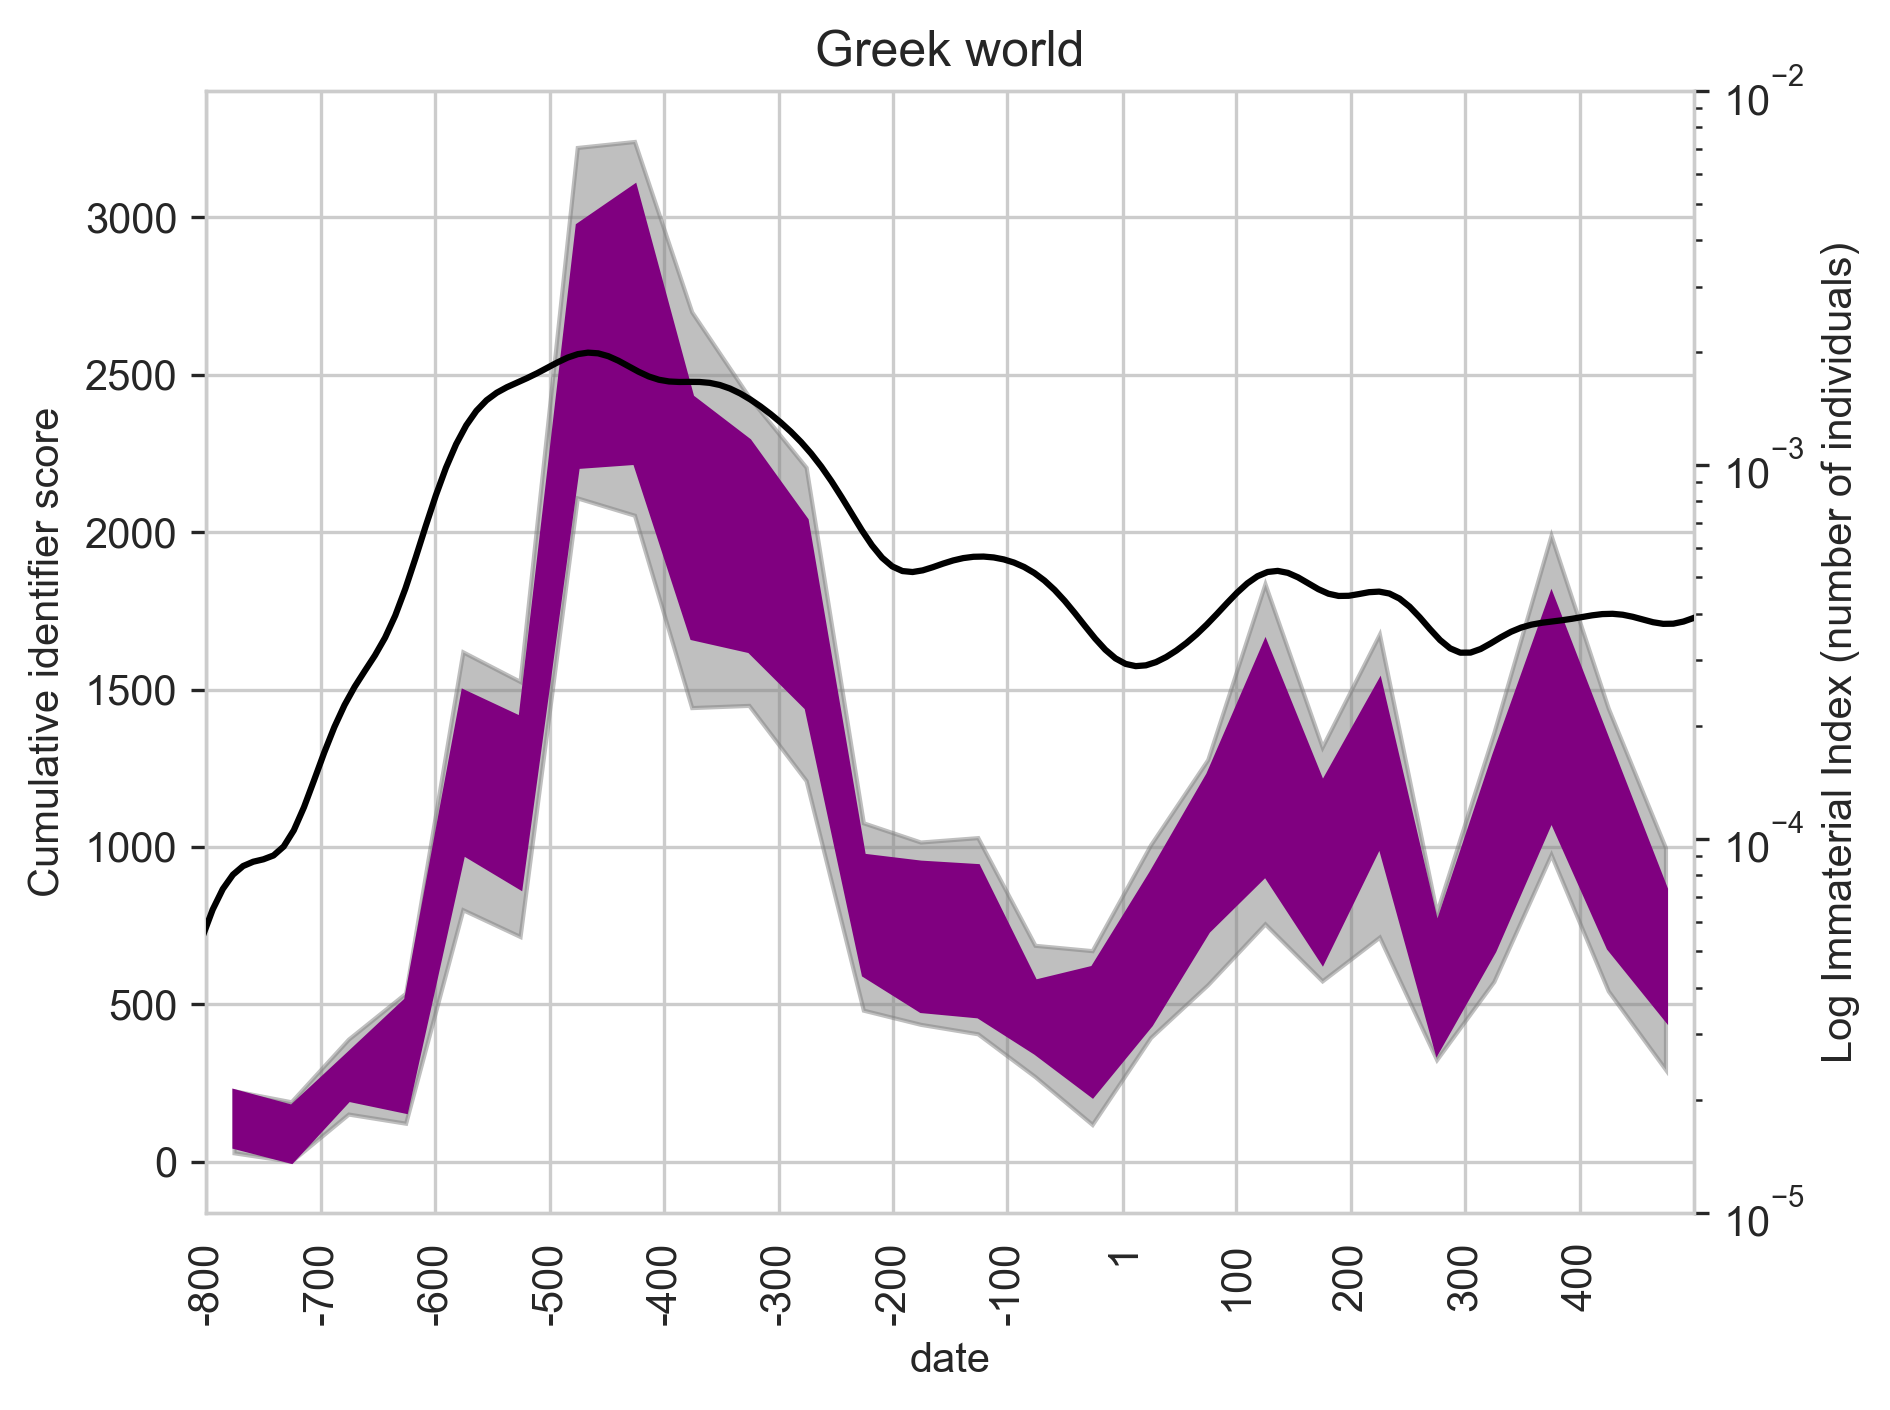

In [148]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

tempun.plot_timeblocks_data(cumulative_identifier_score, color="purple", ax=ax1)
ax1.set_xticks([el + 1 if el == 0 else el for el in range(-800, 500, 100)])
ax1.set_xticklabels([el + 1 if el == 0 else el for el in range(-800, 500, 100)], rotation=90)
ax1.set_xlabel("date")
ax1.set_xlim(-800,500)
ax1.set_ylabel("Cumulative identifier score")

ax1.set_title("Greek world")

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

In [149]:
fig.savefig("am_figures/greece_world_cumulative.png")